# Casing design affects frac geometry and economics
_Ohm Devani_

NOTE: This project will focus on relative economic uplift between 2 casing designs in similar geology.

## Contents
1. Model inputs
2. Base case
    - define per-frac endpoints (min rate defined by dfit initiation rate, max rate defined by hhp of fleet, water volume/frac)
    - economic constants (pump charge, water cost
3. Economic sensitivities
    1. Frac surface area (PKN) vs rate; 2 series for different casing sizes
        - \$ cost/surface area vs rate vs (y-axis 2) surface area
        - Talk about impact of other variables: stress shadow, additional height growth in absence of frac barriers, better proppant/fluid distribution between clusters
    2. Frac pump time vs rate vs $ cost/stage (y2)


### Model parameters

0.7 psi/ft frac gradient
1.0 connate water SG

Horizontal well
Midpoint lateral TVD 10,000 ft

Scenario A:
7" 32# T-95 intermediate casing to 9000 ft (6.094" ID)   
4 1/2" 11.6# P-110 liner to 20000 ft (4" ID)

Scenario B:
5 1/2" 17# P-110 casing to 20000 ft (4.892" ID)





10 clusters/stage
15 ft cluster spacing
60 bbl/ft
ignore proppant
7000 psi target surface pressure
2000 psi target NWB friction

Intermediate 

### Pipe friction estimates

Hazen-Williams for pipe friction
SPE 146674 correlation and adjustment for friction reduction

In [ ]:
def hwfriclosspsi(cfactor,ratebpm,pipeidinch,lengthft):
    hyddiam = 4*(3.14159*(pipeidinch/2)**2)/(2*3.14169*pipeidinch/2)
    hwfriclosspsi = 0.2083*((100/cfactor)**1.852)*((ratebpm*42)**1.852)/(hyddiam**4.8655)*.433*lengthft/100
    return hwfriclosspsi

def freduction(pipeidinch,ratebpm):
    velocftpersec = (5.615*144/60)*ratebpm/(3.14159*(pipeidinch/2)**2)
    fr = 6.2126*velocftpersec**0.5858
    if fr<25:
        fr=25
    elif fr>85:
        fr=85
    return fr

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

bpmrange=list(range(0, 150))
adjfac=0.1
#sceAfric = [hwfriclosspsi(120,i,6.094,9000)*(1-freduction(6.094,i)/100)*adjfac+hwfriclosspsi(120,i,4,11000)*(1-freduction(4,i)/100)*adjfac for i in bpmrange]
#sceBfric = [hwfriclosspsi(120,i,4.892,20000)*(1-freduction(4.892,i)/100)*adjfac for i in bpmrange]

sceAfric = [hwfriclosspsi(120,i,6.094,9000)*adjfac+hwfriclosspsi(120,i,4,11000)*adjfac for i in bpmrange]
sceBfric = [hwfriclosspsi(120,i,4.892,20000)*adjfac for i in bpmrange]

### BHTP & Net Fracture Pressure
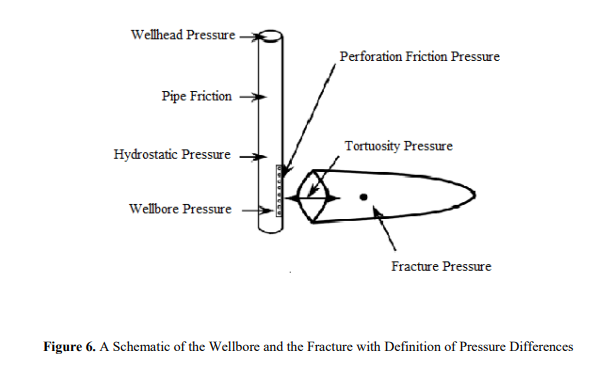

Ozesen, Ahsen. ANALYSIS OF INSTANTANEOUS SHUT-IN PRESSURE IN SHALE OIL AND GAS RESERVOIRS. 2017. Penn State U, Masters Thesis. https://etda.libraries.psu.edu/files/final_submissions/15314.

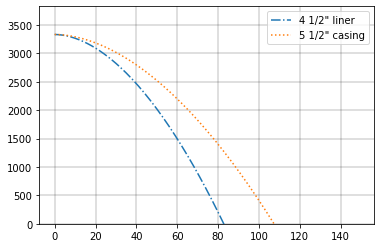

In [69]:
surfpress=7000
tvd=10000
nwbfriction=1000
fracgradient=0.70

def nfp(bhtp,nwbfric,fracgrad,tvd):
    nfp = bhtp-nwbfric-fracgrad*tvd
    #if nfp<0:
    #   nfp=0
    return nfp


bhtpA = [surfpress-i+0.433*tvd for i in sceAfric]
bhtpB = [surfpress-i+0.433*tvd for i in sceBfric]

nfpA = [nfp(i,nwbfriction,fracgradient,tvd) for i in bhtpA]
nfpB = [nfp(i,nwbfriction,fracgradient,tvd) for i in bhtpB]


plt.plot(bpmrange, nfpA, label = "4 1/2\" liner", linestyle="-.")
plt.plot(bpmrange, nfpB, label = "5 1/2\" casing", linestyle=":")
plt.ylim(bottom=0)
plt.grid(color='k', linestyle='-', linewidth=0.25)
plt.legend()
plt.show()

#print(nfpA)
#print(nfpB)